# EDA Smartphones

### Librerías

In [1]:
import pandas as pd
from utils import funciones as f
import re 

# pd.set_option('display.max_colwidth', None)

### Data

In [2]:
df = pd.read_csv('.\data\smartphonesmessy.csv')

In [3]:
df.shape

(1020, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
df.describe(include = 'all').round()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
count,1020,1020,879.0,1020,1020,1020,1020,1020,1019,1013,1003
unique,1020,412,NaN,28,298,58,256,369,285,63,48
top,OnePlus 11 5G,"₹14,999",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Dimensity 700 5G, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v12
freq,1,21,NaN,324,29,267,103,54,40,171,287
mean,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
f.cardinalidad(df)

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad,tipo_variable
0,model,object,0,"[OnePlus 11 5G, OnePlus Nord CE 2 Lite 5G, Sam...",1020,100.000000,nominal
1,price,object,0,"[₹54,999, ₹19,989, ₹16,499, ₹14,999, ₹24,999, ...",412,40.392157,continua
2,rating,float64,141,"[89.0, 81.0, 75.0, 82.0, 80.0, 86.0, 85.0, 84....",30,2.941176,discreta
3,sim,object,0,"[Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, Dual...",28,2.745098,nominal
4,processor,object,0,"[Snapdragon 8 Gen2, Octa Core, 3.2 GHz Process...",298,29.215686,nominal
5,ram,object,0,"[12 GB RAM, 256 GB inbuilt, 6 GB RAM, 128 GB i...",58,5.686275,ordinal
6,battery,object,0,"[5000 mAh Battery with 100W Fast Charging, 500...",256,25.098039,ordinal
7,display,object,0,"[6.7 inches, 1440 x 3216 px, 120 Hz Display wi...",369,36.176471,nominal
8,camera,object,1,[50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fro...,285,27.941176,ordinal
9,card,object,7,"[Memory Card Not Supported, Memory Card (Hybri...",63,6.176471,ordinal


In [7]:
df.dtypes

model         object
price         object
rating       float64
sim           object
processor     object
ram           object
battery       object
display       object
camera        object
card          object
os            object
dtype: object

##### Al analizar los valores dentro de ciertas columnas podemos concluir:
- La columna 'ram' tiene datos que no corresponden a por ejemplo: 'Dual Core, 500\u2009MHz Processor'
- La columna 'processor' con tiene datos que no se corresponden los demás por ejemplo: '4\u2009MB RAM, 4\u2009MB inbuilt', '1450\u2009mAh Battery'
- La columna 'ram' tiene datos que no se corresponden con lo demás, por ejemplo: '1.5 inches, 120\u2009x\u2009120\u2009px Display'
- La columna 'battery' tiene datos que no se corresponden con los demás, por ejemplo: '48\u2009MB RAM, 128\u2009MB inbuilt'
- La columna 'display' tiene datos que no se corresponden con los demás, por ejemplo: '0.3\u2009MP Rear Camera'
- La columna 'camera' tiene datos que no se corresponden con los demás, por ejemplo: '1.77 inches, 240\u2009x\u2009320\u2009px Display'
- La columna 'card' tiene datos que no se corresponden con los demás, por ejemplo: '50\u2009MP + 48\u2009MP + 32\u2009MP Triple Rear & 32\u2009MP + 32\u2009MP Dual Front Camera'
- La columna 'os' tiene datos que no se corresponden con los demás, por ejemplo: 'Memory Card Supported, upto 32\u2009GB'
- La columna 'price' esta en rupias

#### Analisis de la variable objetivo

------------------------------------------------------------
VARIABLE: rating



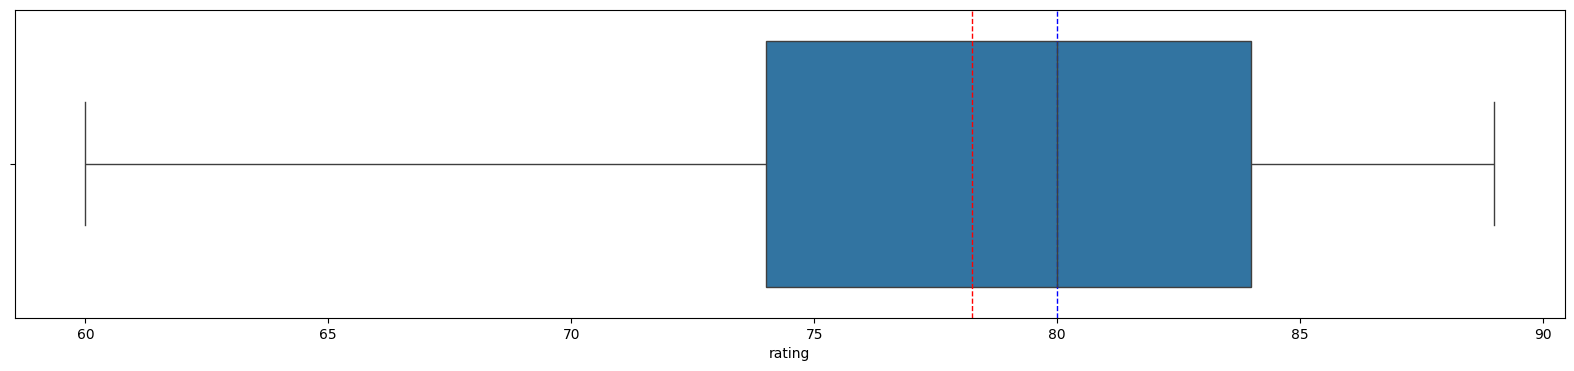

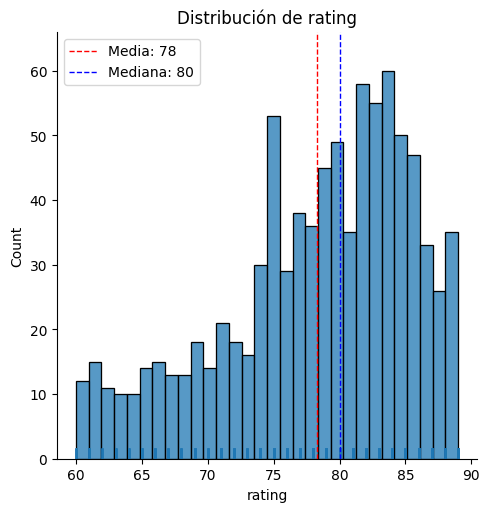

count    879.0
mean      78.0
std        7.0
min       60.0
25%       74.0
50%       80.0
75%       84.0
max       89.0
Name: rating, dtype: float64
------------------------------------------------------------


In [8]:
f.graficos_variables_cuant(df[['rating']])

----------------------------------------------------------------------------------------------------
VARIABLE: model

Son demasiados valores únicos no se puede graficar
count              1020
unique             1020
top       OnePlus 11 5G
freq                  1
Name: model, dtype: object
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: price

Son demasiados valores únicos no se puede graficar
count        1020
unique        412
top       ₹14,999
freq           21
Name: price, dtype: object
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: sim



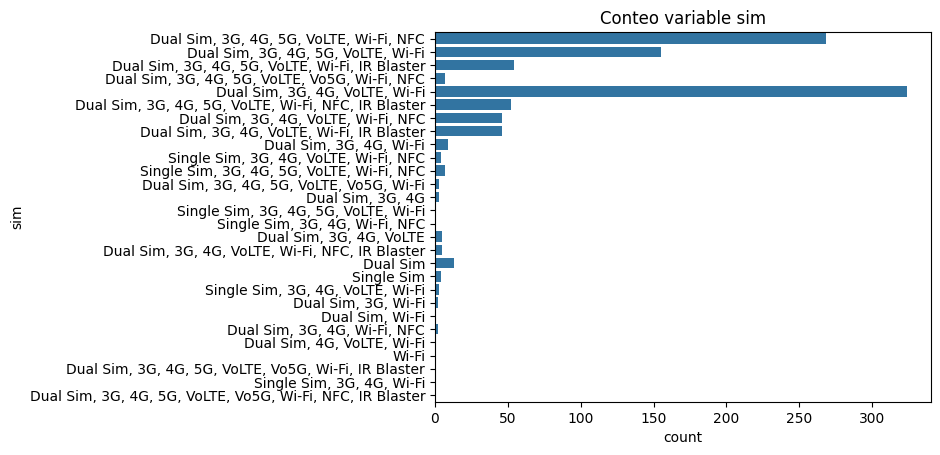

count                               1020
unique                                28
top       Dual Sim, 3G, 4G, VoLTE, Wi-Fi
freq                                 324
Name: sim, dtype: object
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: processor

Son demasiados valores únicos no se puede graficar
count                                               1020
unique                                               298
top       Dimensity 700 5G, Octa Core, 2.2 GHz Processor
freq                                                  29
Name: processor, dtype: object
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: ram

Son demasiados valores únicos no se puede graficar
count     

In [9]:
f.graficos_variables_cualit(df.select_dtypes(exclude ='number'))

#### Limpieza de datos

1. Conversión de al columna 'price' de rupias a euros mediante una función

In [10]:
df = f.cambiar_precio_a_euros(df)

In [11]:
df.head()

,model,rating,sim,processor,ram,battery,display,camera,card,os,precio_euros
0,OnePlus 11 5G,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,604.989
1,OnePlus Nord CE 2 Lite 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,219.879
2,Samsung Galaxy A14 5G,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,181.489
3,Motorola Moto G62 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,164.989
4,Realme 10 Pro Plus,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,274.989


2. Divisón de la columna 'sim' en varias columnas dependiendo si tiene o no esa caracteristica

In [12]:
df = f.columna_sim(df)

In [13]:
df.head()

,model,rating,sim,processor,ram,battery,display,camera,card,os,...,cuatro_g,ir_blaster,nfc,tres_g,wifi,single_sim,volte,cinco_g,dual_sim,vo_5g
0,OnePlus 11 5G,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,...,1,0,1,1,1,0,1,1,1,0
1,OnePlus Nord CE 2 Lite 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,...,1,0,0,1,1,0,1,1,1,0
2,Samsung Galaxy A14 5G,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,...,1,0,0,1,1,0,1,1,1,0
3,Motorola Moto G62 5G,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,...,1,0,0,1,1,0,1,1,1,0
4,Realme 10 Pro Plus,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,...,1,0,0,1,1,0,1,1,1,0


In [46]:
df[~df['processor'].str.contains('Processor')]

,model,rating,sim,processor,ram,battery,display,camera,card,os,...,ir_blaster,nfc,tres_g,wifi,single_sim,volte,cinco_g,dual_sim,vo_5g,camara
152,Apple iPhone 15 Pro Max,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 256 GB inbuilt",4352 mAh Battery with 25W Fast Charging,"6.68 inches, 1284 x 2778 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,...,0,1,1,1,0,1,1,1,0,50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
263,Apple iPhone XR2,60.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",Apple A13,"4 GB RAM, 64 GB inbuilt",3060 mAh Battery with Fast Charging,"6.1 inches, 828 x 1792 px Display",12 MP + 5 MP Dual Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v12.3,...,0,1,1,1,0,1,0,1,0,12 MP + 5 MP Dual Rear & 7 MP Front Camera
282,Apple iPhone 14 Mini,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",Bionic A16,"6 GB RAM, 128 GB inbuilt",3500 mAh Battery with Fast Charging,"5.42 inches, 1080 x 2340 px Display with Punch...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v15,...,0,1,1,1,0,1,0,1,0,12 MP + 12 MP Dual Rear & 12 MP Front Camera
376,Nokia 2660 Flip,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera,...,0,0,1,0,0,0,0,1,0,0.3 MP Rear Camera
429,Nokia X50 5G,76.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",Snapdragon 775,"6 GB RAM, 64 GB inbuilt",6000 mAh Battery with 33W Fast Charging,"6.81 inches, 1080 x 2400 px Display with Punch...",108 MP Quad Rear & 32 MP Front Camera,Memory Card Supported,Android v11,...,0,0,1,1,1,1,1,0,0,108 MP Quad Rear & 32 MP Front Camera
448,Apple iPhone 15 Pro,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio,...,0,1,1,1,0,1,1,1,0,50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
473,Nokia 110 4G,NaN,"Dual Sim, 3G, 4G, VoLTE",No Wifi,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",NaN,...,0,0,1,0,0,1,0,1,0,0.3 MP Rear Camera
532,Samsung Guru Music 2 Dual Sim,NaN,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN,...,0,0,0,0,0,0,0,1,0,No Rear Camera
551,itel Magic 2 4G,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"64 MB RAM, 128 MB inbuilt",1900 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB",...,0,0,1,1,0,1,0,1,0,1.3 MP Rear Camera
573,Nokia 105 (2019),NaN,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,NaN,...,0,0,0,0,1,0,0,0,0,No Rear Camera


In [39]:
df[df['ram'].str.contains('Processor')]

,model,rating,sim,processor,ram,battery,display,camera,card,os,...,ir_blaster,nfc,tres_g,wifi,single_sim,volte,cinco_g,dual_sim,vo_5g,camara
532,Samsung Guru Music 2 Dual Sim,NaN,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN,...,0,0,0,0,0,0,0,1,0,No Rear Camera
611,Eunity U1 5605N,NaN,Dual Sim,No 3G,"Dual Core, 500 MHz Processor","32 MB RAM, 32 MB inbuilt",3000 mAh Battery,"1.8 inches, 128 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB",...,0,0,0,0,0,0,0,1,0,0.3 MP Rear Camera


In [29]:
df['camara'] = df.apply(lambda row: row['camera'] if 'Camera' in str(row['camera']) else (
                        row['os'] if 'Camera' in str(row['os']) else (
                        row['card'] if 'Camera' in str(row['card']) else (
                        row['display'] if 'Camera' in str(row['display']) else (
                        row['battery'] if 'Camera' in str(row['battery']) else 'No Rear Camera')))), axis=1)

In [51]:
df['procesador'] = df.apply(lambda row: row['processor'] if 'Processor' in str(row['processor']) else (
                        row['ram'] if 'Processor' in str(row['ram']) else 'REVISAR'), axis=1)

In [54]:
df[df['procesador'] == 'REVISAR']

,model,rating,sim,processor,ram,battery,display,camera,card,os,...,nfc,tres_g,wifi,single_sim,volte,cinco_g,dual_sim,vo_5g,camara,procesador
152,Apple iPhone 15 Pro Max,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 256 GB inbuilt",4352 mAh Battery with 25W Fast Charging,"6.68 inches, 1284 x 2778 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,...,1,1,1,0,1,1,1,0,50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,REVISAR
263,Apple iPhone XR2,60.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",Apple A13,"4 GB RAM, 64 GB inbuilt",3060 mAh Battery with Fast Charging,"6.1 inches, 828 x 1792 px Display",12 MP + 5 MP Dual Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v12.3,...,1,1,1,0,1,0,1,0,12 MP + 5 MP Dual Rear & 7 MP Front Camera,REVISAR
282,Apple iPhone 14 Mini,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",Bionic A16,"6 GB RAM, 128 GB inbuilt",3500 mAh Battery with Fast Charging,"5.42 inches, 1080 x 2340 px Display with Punch...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v15,...,1,1,1,0,1,0,1,0,12 MP + 12 MP Dual Rear & 12 MP Front Camera,REVISAR
376,Nokia 2660 Flip,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera,...,0,1,0,0,0,0,1,0,0.3 MP Rear Camera,REVISAR
429,Nokia X50 5G,76.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",Snapdragon 775,"6 GB RAM, 64 GB inbuilt",6000 mAh Battery with 33W Fast Charging,"6.81 inches, 1080 x 2400 px Display with Punch...",108 MP Quad Rear & 32 MP Front Camera,Memory Card Supported,Android v11,...,0,1,1,1,1,1,0,0,108 MP Quad Rear & 32 MP Front Camera,REVISAR
448,Apple iPhone 15 Pro,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio,...,1,1,1,0,1,1,1,0,50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,REVISAR
473,Nokia 110 4G,NaN,"Dual Sim, 3G, 4G, VoLTE",No Wifi,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",NaN,...,0,1,0,0,1,0,1,0,0.3 MP Rear Camera,REVISAR
551,itel Magic 2 4G,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"64 MB RAM, 128 MB inbuilt",1900 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB",...,0,1,1,0,1,0,1,0,1.3 MP Rear Camera,REVISAR
573,Nokia 105 (2019),NaN,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,NaN,...,0,0,0,1,0,0,0,0,No Rear Camera,REVISAR
582,Nokia 8210 4G,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",...,0,1,0,0,0,0,1,0,0.3 MP Rear Camera,REVISAR
